In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Common imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import sqrt
import os

# Primeira Parte: Sistema de Mackey-Glass

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "primeira_parte"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Importando e interpretando os dados

In [3]:
DATASET_PATH = os.path.join("datasets")

In [4]:
# Importação do dataset
def load_mackeyglass_data(dataset_path=DATASET_PATH):
    csv_path = os.path.join(dataset_path, "mackeyglass.csv")
    return pd.read_csv(csv_path)

In [6]:
mackeyglass = load_mackeyglass_data()
mackeyglass.head()

,t,p
0,0.0,0.188921
1,1.0,0.190910
2,2.0,0.194433
3,3.0,0.199178
4,4.0,0.204882


In [7]:
mackeyglass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       5000 non-null   float64
 1   p       5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [8]:
mackeyglass.describe()

,t,p
count,5000.000000,5000.000000
mean,2499.500000,0.908258
std,1443.520003,0.263595
min,0.000000,0.188921
25%,1249.750000,0.746241
50%,2499.500000,0.944711
75%,3749.250000,1.109743
max,4999.000000,1.366951


Saving figure mackeyglass


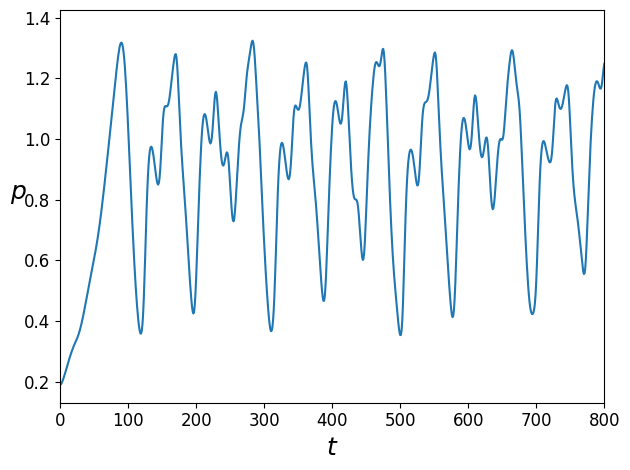

In [9]:
# Coversão para numpy
t_data = mackeyglass['t'].to_numpy()
p_data = mackeyglass['p'].to_numpy()
# Plotagem dos dados 
plt.plot(t_data, p_data)
plt.xlabel("$t$", fontsize=18)
plt.ylabel("$p$", rotation=0, fontsize=18)
plt.xlim(0,800)
save_fig("mackeyglass")
plt.show()

In [10]:
# Separando o conjunto de dados do conjunto de teste, sendo os últimos 750 amostras reservadas para o conjunto de teste
# e criando o conjunto de validação
# Para a validação foram utilizados 20% dos últimos dados de treinamento
p_test = p_data[-750:]
t_test = t_data[-750:]
p_train = p_data[:-850-750]
t_train = t_data[:-850-750]
p_validation = p_data[-850-750:-750]
p_teste = t_data[-850-750:-750]
teste_matriz = p_data[:-4980]
print("O comprimento do conjunto de treinamento é:",len(p_train))
print("O comprimento do conjunto de validação é:",len(p_validation))
print("O comprimento do conjunto de teste é:",len(p_test))
print(teste_matriz)

O comprimento do conjunto de treinamento é: 3400
O comprimento do conjunto de validação é: 850
O comprimento do conjunto de teste é: 750
[0.188921   0.19091041 0.19443267 0.19917811 0.20488197 0.2113189
 0.21829773 0.22565703 0.23326116 0.24099693 0.24877041 0.25650438
 0.26413596 0.27161461 0.27890031 0.28596206 0.29277651 0.29932678
 0.30560142 0.31159358]


In [12]:
# Criando a matriz dos dados passados x 
L=7    # Horizonte de predição
K=5    # Hiperparâmetro K
# Criação da matriz y com os dados futuros para L=7
y = []
for i in range(K+L-1, len(teste_matriz)):
    y.append(teste_matriz[i])
# coluna de uns que será concatenada com a matriz x_data
one = np.ones(shape=(len(y)))
#Criação da matriz x_data com K valores passados
x_data = []
indice=0
# matriz com o shift 1 posição do vetor a cada linha
for j in range (0,len(y)):    # Define as linhas da matriz
    l=[]                      # Matriz = listade listas
    for i in range (0,K):     # define o que tem em cada linha da matriz
        l.append(teste_matriz[indice+i])       # Coloca em cada vetor K elementos do conjunto de dados
    x_data.append(l)                           # Coloca os vetores na matriz
    indice=indice+1                           # Para cada iteração do loop de j a variável indice soma 1
                                              # Com isso cada linha começa com uma posição a mais que a anterior
# Concatenação do vetor de uns com a matriz x_data para formar a matriz x
x=np.column_stack((one,x_data))
print(x)
print(y)
print(len(x))
print(len(y))

[[1.         0.188921   0.19091041 0.19443267 0.19917811 0.20488197]
 [1.         0.19091041 0.19443267 0.19917811 0.20488197 0.2113189 ]
 [1.         0.19443267 0.19917811 0.20488197 0.2113189  0.21829773]
 [1.         0.19917811 0.20488197 0.2113189  0.21829773 0.22565703]
 [1.         0.20488197 0.2113189  0.21829773 0.22565703 0.23326116]
 [1.         0.2113189  0.21829773 0.22565703 0.23326116 0.24099693]
 [1.         0.21829773 0.22565703 0.23326116 0.24099693 0.24877041]
 [1.         0.22565703 0.23326116 0.24099693 0.24877041 0.25650438]
 [1.         0.23326116 0.24099693 0.24877041 0.25650438 0.26413596]]
[0.2565043809365608, 0.2641359639814603, 0.2716146094151473, 0.2789003128379029, 0.2859620644983993, 0.2927765145292346, 0.2993267763988331, 0.3056014169734897, 0.3115935763213048]
9
9


# Segunda Parte

In [13]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "segunda_parte"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)